# 1. Show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("Desktop\\assignment 1\\data.csv",dtype='object')

In [23]:
df['report_date']=df.report_date.str.replace('_','-')

In [25]:
df['report_date']=pd.to_datetime(df.report_date)

In [26]:
df.drop(['time_period','time_period_type'],axis=1,inplace=True)

In [27]:
df.unit.fillna("none",inplace=True)
df.location.fillna("none",inplace=True)
df.location_type.fillna("none",inplace=True)
df.data_field.fillna("none",inplace=True)
df.data_field_code.fillna("none",inplace=True)

In [28]:
df.dropna(inplace=True)

In [41]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


C:\Users\KAJUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


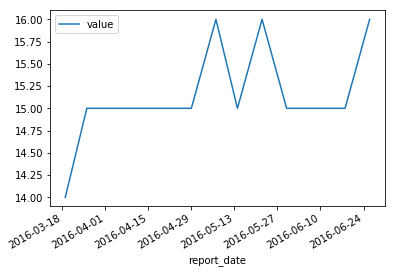

In [40]:
df1=df.query("data_field_code=='AR0005' and location=='Argentina-Catamarca'")
df1['value']=df1['value'].apply(pd.to_numeric)
df1=df1[['report_date','value']]
df1.plot(x='report_date',y='value')

# 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.

C:\Users\KAJUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0,0.5,'value where unit is cases')

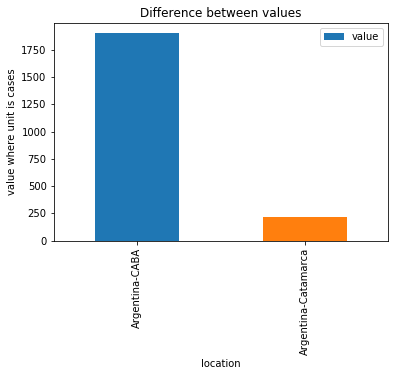

In [108]:
df2=df.query("(location=='Argentina-CABA' and unit=='cases' )or (location=='Argentina-Catamarca'and unit=='cases')")
df2['value']=df2['value'].apply(pd.to_numeric)
df2.reset_index()
df3=df2.groupby('location').sum()
df3.plot(kind='bar',y='value')
plt.title("Difference between values")
plt.xlabel('location')
plt.ylabel('value where unit is cases')

# 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

                                     value
data_field                                
cumulative_cases_discarded             251
cumulative_cases_under_study          2981
cumulative_confirmed_imported_cases     32
cumulative_confirmed_local_cases         0
cumulative_probable_imported_cases      15
cumulative_probable_local_cases          0


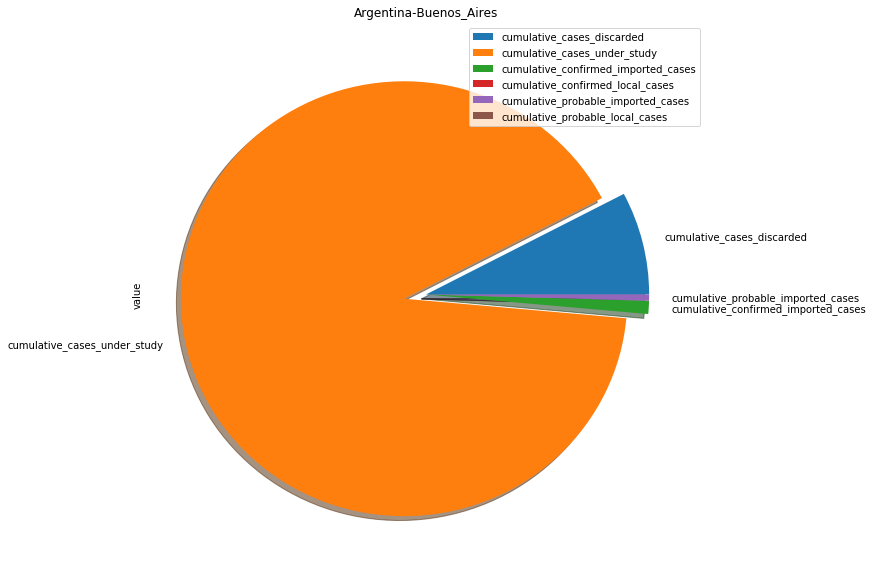

In [149]:
data1=df.query("location=='Argentina-Buenos_Aires'")
data1=data1[['data_field','value']]
data1['value']=data1['value'].apply(pd.to_numeric)
data1=data1.groupby('data_field').sum()
print(data1)
data1.plot(kind='pie',y='value',figsize=(10,10),shadow=True,title='Argentina-Buenos_Aires',explode=(0,0.1,0,0,0,0))

                                     value
data_field                                
cumulative_cases_discarded              27
cumulative_cases_under_study          1748
cumulative_confirmed_imported_cases    124
cumulative_confirmed_local_cases         0
cumulative_probable_imported_cases       0
cumulative_probable_local_cases          0


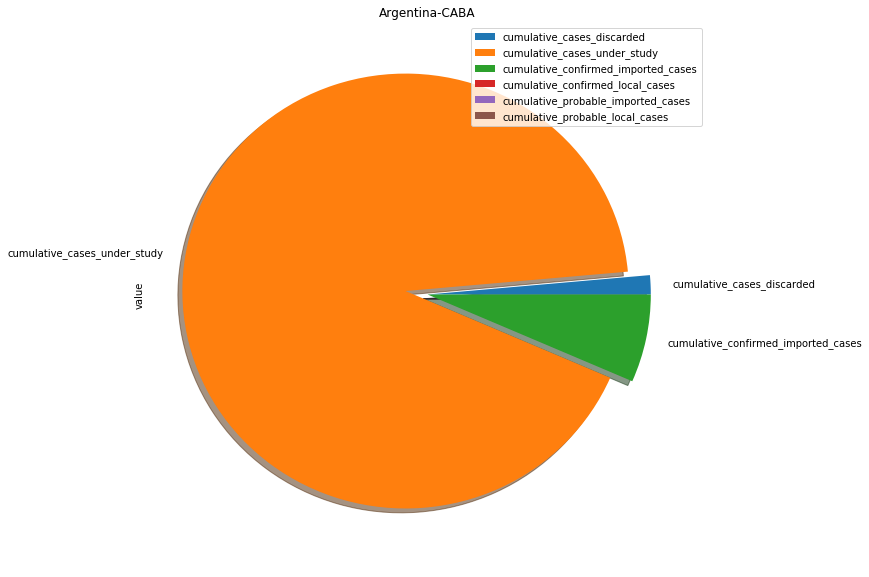

In [148]:
data1=df.query("location=='Argentina-CABA'")
data1=data1[['data_field','value']]
data1['value']=data1['value'].apply(pd.to_numeric)
data1=data1.groupby('data_field').sum()
print(data1)
data1.plot(kind='pie',y='value',figsize=(10,10),shadow=True,explode=(0,0.1,0,0,0,0),title='Argentina-CABA')

                                     value
data_field                                
cumulative_cases_discarded               0
cumulative_cases_under_study           212
cumulative_confirmed_imported_cases      0
cumulative_confirmed_local_cases         0
cumulative_probable_imported_cases       0
cumulative_probable_local_cases          0


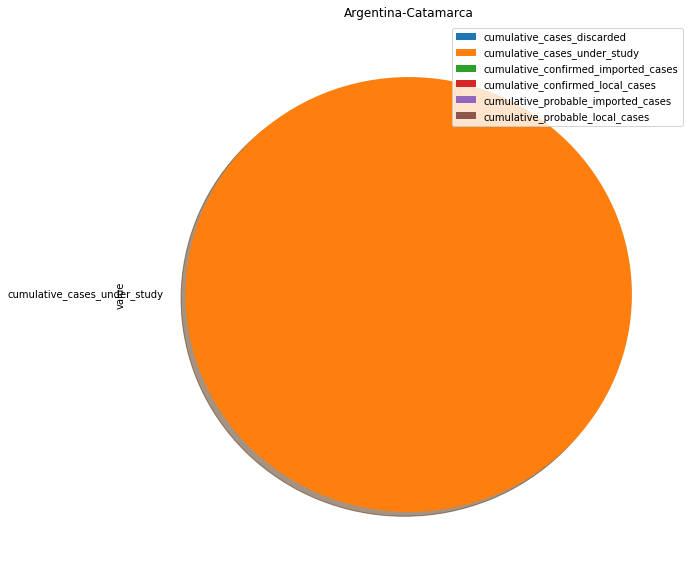

In [151]:
data1=df.query("location=='Argentina-Catamarca'")
data1=data1[['data_field','value']]
data1['value']=data1['value'].apply(pd.to_numeric)
data1=data1.groupby('data_field').sum()
print(data1)
data1.plot(kind='pie',y='value',figsize=(10,10),shadow=True,title='Argentina-Catamarca')

# 4. Build a program to predict the correct word for wrongly typed word. 

In [56]:
import re
from nltk.metrics import edit_distance
def correction(text):
    with open("big.txt",'r') as f:
        data=f.read()
    word=re.findall(r"[\w']+",data)
    words=set(word)
    ele=words.pop()
    words.add(ele)
    dis=edit_distance(ele,text)
    for word in words:
        if dis>edit_distance(word,text):
            dis=edit_distance(word,text)
            result=word
    return result

In [57]:
correction("televesion")

'television'

In [58]:
correction("spmetheng")

'something'

In [59]:
correction("strewbarry")

'strawberry'

In [60]:
correction("melisious")

'malicious'